In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import os
import mahotas 

import cv2

import h5py
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

Could not import submodules (exact error was: numpy.core.multiarray failed to import).

There are many reasons for this error the most common one is that you have
either not built the packages or have built (using `python setup.py build`) or
installed them (using `python setup.py install`) and then proceeded to test
mahotas **without changing the current directory**.

Try installing and then changing to another directory before importing mahotas.


In [1]:
# make a fix file size
fixed_size  = tuple((500,500))

#train path 
train_path = "C:/Users/02bar/Documents/TELECOM/PAF/ISIC_2018_TEST/train - Copie - Copie"

# no of trees for Random Forests
num_tree = 100

# bins for histograms 
bins = 8

# train_test_split size
test_size = 0.10

# seed for reproducing same result 
seed = 9 

In [2]:
# features description -1:  Hu Moments

def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [3]:
from skimage.feature import greycomatrix, greycoprops

def fd_haralick(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calculate the gray-level co-occurrence matrix
    glcm = greycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    # Calculate the haralick texture features
    #haralick_features = greycoprops(glcm, 'homogeneity', 'correlation', 'energy', 'contrast', 'dissimilarity').ravel()
    properties = ['homogeneity', 'correlation', 'energy', 'contrast', 'dissimilarity']
    haralick_features = []
    for prop in properties:
        haralick_feature = greycoprops(glcm, prop).ravel()
    haralick_features.append(haralick_feature)
    haralick_features = np.concatenate(haralick_features)
    return haralick_features


In [4]:
# feature-description -3 Color Histogram

def fd_histogram(image, mask=None):
    # conver the image to HSV colors-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    #COPUTE THE COLOR HISTPGRAM
    hist  = cv2.calcHist([image],[0,1,2],None,[bins,bins,bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist,hist)
    # return the histog....
    return hist.flatten()

In [5]:
def segmentation(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Remove hair with opening
    kernel = np.ones((5,5),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

    # Combine surrounding noise with ROI
    kernel = np.ones((6,6),np.uint8)
    dilate = cv2.dilate(opening,kernel,iterations=3)

    # Blur the image for smoother ROI
    blur = cv2.blur(dilate,(15,15))

    # Perform another OTSU threshold and search for biggest contour
    ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    cnt = max(contours, key=cv2.contourArea)

    # Create a new mask for the result image
    h, w = img.shape[:2]
    mask = np.zeros((h, w), np.uint8)

    # Draw the contour on the new mask and perform the bitwise operation
    cv2.drawContours(mask, [cnt],-1, 255, -1)
    res = cv2.bitwise_and(img, img, mask=mask)
    
    # Display the result
    cv2.imshow('img', opening)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    plt.imshow(gray)
    plt.title("test")
    plt.show()
    print("SEGMENTATION GOOD")
    return res
    

In [7]:
import os
# get the training data labels 
train_labels = os.listdir(train_path)

# sort the training labesl 
train_labels.sort()
print(train_labels)

# empty list to hold feature vectors and labels 
global_features = []
labels = []

i, j = 0, 0 
k = 0

# num of images per class 
images_per_class = 80

['Benign', 'Malignant']


In [9]:
import mahotas 

import cv2

import h5py
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xe

Could not import submodules (exact error was: numpy.core.multiarray failed to import).

There are many reasons for this error the most common one is that you have
either not built the packages or have built (using `python setup.py build`) or
installed them (using `python setup.py install`) and then proceeded to test
mahotas **without changing the current directory**.

Try installing and then changing to another directory before importing mahotas.


heyyyy
Wall time: 0 ns
hey
hey


NameError: name 'np' is not defined

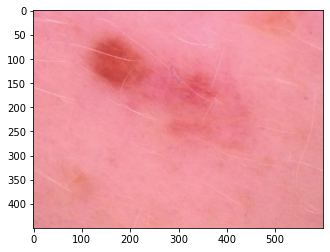

In [10]:

# ittirate the folder to get the image label name
print("heyyyy")
%time

# lop over the training data sub folder 
print("hey")
for training_name in train_labels:
    print("hey")
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name

    k = 1
    # loop over the images in each sub-folder
        
    for file in os.listdir(dir):

        file = dir + "/" + os.fsdecode(file)
       
        # read the image and resize it to a fixed-size
        image = cv2.imread(file) 
        
        if image is not None:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            image = cv2.resize(image,fixed_size)
            image = segmentation(image)
            fv_hu_moments = fd_hu_moments(image)
            fv_haralick   = fd_haralick(image)
            fv_histogram  = fd_histogram(image)
        #else:
            #print("image not loaded")
                
        #image = cv2.imread(file)        
        #image = cv2.resize(image,fixed_size)

        # Concatenate global features
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

        # update the list of labels and feature vectors
        labels.append(current_label)
        global_features.append(global_feature)
        #global_features = global_features.tolist()
        #global_features.append(global_feature)

        i += 1
        k += 1
    print("[STATUS] processed folder: {}".format(current_label))
    j += 1

print("[STATUS] completed Global Feature Extraction...")

In [ ]:
%time
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))

# encode the target labels
targetNames = np.unique(labels)
le = LabelEncoder()
target = le.fit_transform(labels)
print("[STATUS] training labels encoded...{}")
# normalize the feature vector in the range (0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))

# save the feature vector using HDF5
h5f_data = h5py.File("C:/Users/02bar/Documents/TELECOM/PAF/output_data_3.h5", 'w')
h5f_data.create_dataset("C:/Users/02bar/Documents/TELECOM/PAF/dataset_1", data=np.array(rescaled_features))

h5f_label = h5py.File("C:/Users/02bar/Documents/TELECOM/PAF/output_labels_3.h5", 'w')
h5f_label.create_dataset("C:/Users/02bar/Documents/TELECOM/PAF/dataset_1", data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] end of training..")

In [ ]:
# import the feature vector and trained labels

h5f_data = h5py.File("C:/Users/02bar/Documents/TELECOM/PAF/output_data_3.h5", 'r')
h5f_label = h5py.File("C:/Users/02bar/Documents/TELECOM/PAF/output_labels_3.h5", 'r')

global_features_string = h5f_data["C:/Users/02bar/Documents/TELECOM/PAF/dataset_1"]
global_labels_string = h5f_label["C:/Users/02bar/Documents/TELECOM/PAF/dataset_1"]

global_features = np.array(global_features_string)
global_labels = np.array(global_labels_string)

In [ ]:
# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

In [ ]:
# create the model - Random Forests
clf  = RandomForestClassifier(n_estimators=100)

# fit the training data to the model
clf.fit(trainDataGlobal, trainLabelsGlobal)

#print(clf.fit(trainDataGlobal, trainLabelsGlobal))

clf_pred = clf.predict(trainDataGlobal)
#clf_pred = clf.predict(global_feature.reshape(1,-1))[0]
#print(classification_report(trainLabelsGlobal,clf_pred))
#print(confusion_matrix(trainLabelsGlobal,clf_pred))

print(clf.predict(trainDataGlobal))

print(clf.predict(global_feature.reshape(1,-1))[0])

In [ ]:
# path to test data
test_path = "C:/Users/02bar/Documents/TELECOM/PAF/ISIC_2018_TEST/test - Copie - Copie/Malignant"
res_labels = []
# loop through the test images
#for file in glob.glob(test_path + "/*.jpg"):
for file in os.listdir(test_path):    
    print("hey")
    file = test_path + "/" + file
    #print(file)
    
    # read the image
    image = cv2.imread(file)

    # resize the image
    image = cv2.resize(image, fixed_size)
    image = segmentation(image)
    # Global Feature extraction
    fv_hu_moments = fd_hu_moments(image)
    fv_haralick   = fd_haralick(image)
    fv_histogram  = fd_histogram(image)
    """
    print("fv_hu_moments")
    print(fv_hu_moments)
    print(" fv_haralick")
    print( fv_haralick)
    print("fv_histogram")
    print(fv_histogram)
    """
    # Concatenate global features

    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
    # predict label of test image
    prediction = clf.predict(global_feature.reshape(1,-1))[0]
    
    # show predicted label on image
    cv2.putText(image, train_labels[prediction], (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)
    res_labels.append(train_labels[prediction])
    # display the output image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
print(res_labels)
from sklearn.metrics import accuracy_score
true_labels = ["Malignant","Malignant","Malignant","Malignant","Malignant","Malignant","Malignant","Malignant","Malignant","Malignant","Malignant","Malignant","Malignant","Malignant","Malignant","Malignant","Malignant","Malignant","Malignant"]
# Assuming you have true labels in the 'true_labels' variable and predicted labels in the 'predicted_labels' variable
accuracy = accuracy_score(true_labels, res_labels)

print("Accuracy:", accuracy)